In [30]:
import numpy as np

import matplotlib.pyplot as plt
import glob
#%matplotlib inline
import pyfits
import scipy.optimize as optimization
from scipy.optimize import curve_fit
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times']})

In [2]:
datadir = "/Volumes/VIRT-Data/20170705/"

In [3]:
biglist_flatc=glob.glob(datadir+'flatC*')

In [4]:
#print(biglist_flatc)

In [5]:
def createlist(bl, E, T):
    smalllist_flatc = []
    for flatc in bl:
        myfile=pyfits.open(flatc)
        head1=myfile[0].header
        if float(head1['EXPOSURE']) == E and float(head1['TEMPCCD']) == T:
            smalllist_flatc.append(flatc)
    return smalllist_flatc

In [6]:
worklist10 = createlist(biglist_flatc, 10.0, -30)
worklist30 = createlist(biglist_flatc, 30.0, -30)
worklist60 = createlist(biglist_flatc, 60.0, -30)
worklist120 = createlist(biglist_flatc, 120.0, -30)
worklist240 = createlist(biglist_flatc, 240.0, -30)


In [7]:
#print(len(worklist10))

In [8]:
#def calcmead(wl):
    #mead_counts = []
    #for flatc in wl:
        #myfile=pyfits.open(flatc)
        #mead_counts.append(float(np.meadian(myfile[0].data)))
        #myfile.close()
        
    #return mead_counts


In [7]:
def calcmed(wl):    
    med_counts = []
    for flatc in wl:
        myfile=pyfits.open(flatc)
        med_counts.append(float(np.median(myfile[0].data)))
        myfile.close()
        
    return np.median(med_counts), np.std(med_counts)


In [8]:
med10s, std10s= calcmed(worklist10)
med30s, std30s = calcmed(worklist30)
med60s, std60s = calcmed(worklist60)
med120s, std120s = calcmed(worklist120)
med240s, std240s = calcmed(worklist240)

In [9]:
meds_flatc = (med10s, med30s, med60s, med120s, med240s)
stds_flatc= (std10s, std30s, std60s, std120s, std240s)

In [10]:
#print(stds)

In [11]:
exposure = (10.0, 30.0, 60.0, 120.0, 240.0)

In [12]:
#print(len(meds))

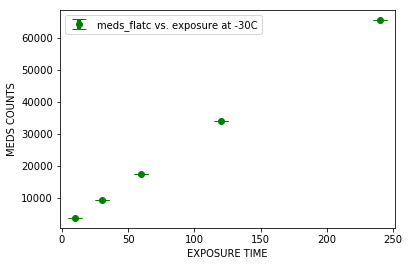

In [13]:
plt.errorbar(
    x = exposure, label = 'meds_flatc vs. exposure at -30C',
    y = meds_flatc, 
    yerr = stds_flatc, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDS COUNTS")
plt.legend()
plt.savefig("Errorflatc30.pdf")
plt.show()

In [43]:
biglist_flatr=glob.glob(datadir+'flatR*')


['/Volumes/VIRT-Data/20170613/flatR_2017613231043.fits', '/Volumes/VIRT-Data/20170613/flatR_2017613231148.fits', '/Volumes/VIRT-Data/20170613/flatR_2017613231254.fits', '/Volumes/VIRT-Data/20170613/flatR_201761323140.fits', '/Volumes/VIRT-Data/20170613/flatR_201761323157.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494016.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494122.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494228.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494333.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494439.fits']


In [15]:
def createlist(bl, E, T):
    smalllist_flatr = []
    for flatr in bl:
        myfile=pyfits.open(flatr)
        head1=myfile[0].header
        if float(head1['EXPOSURE']) == E and float(head1['TEMPCCD']) == T:
            smalllist_flatr.append(flatr)
    return smalllist_flatr

In [16]:
worklist_30 = createlist(biglist_flatr, 30.0, -30)
worklist_60 = createlist(biglist_flatr, 60.0, -30)
worklist_120 = createlist(biglist_flatr, 120.0, -30)
worklist_240 = createlist(biglist_flatr, 240.0, -30)

In [17]:
def calcmed(wl):    
    med_counts = []
    for flatr in wl:
        myfile=pyfits.open(flatr)
        med_counts.append(float(np.median(myfile[0].data)))
        myfile.close()
        
    return np.median(med_counts), np.std(med_counts)


In [18]:
med_30s, std_30s= calcmed(worklist_30)
med_60s, std_60s = calcmed(worklist_60)
med_120s, std_120s = calcmed(worklist_120)
med_240s, std_240s = calcmed(worklist_240)

In [19]:
meds_flatr=(med_30s, med_60s, med_120s, med_240s)
stds_flatr=(std_30s, std_60s, std_120s, std_240s)

In [20]:
print(std_120s, std_240s)

(2.5, 0.0)


In [21]:
print(meds_flatr)

(5874.0, 10829.0, 20735.5, 40516.0)


In [22]:
exposure2 = (30.0, 60.0, 120.0, 240.0)

In [23]:
plt.errorbar(
    x = exposure2, label = 'meds_flatr vs. exposure at -30C',
    y = meds_flatr, 
    yerr = stds_flatr, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDS COUNTS")
plt.legend()
plt.savefig("Errorflatr30.pdf")

In [24]:
plt.figure(figsize = (12, 9))
plt.subplot(2,1,1)
#fig, axs = plt.subplots(2,2)
#fig.subplots_adjust(left = 0.08, right = 0.98, wspace = 0.3)

plt.errorbar(
    x = exposure, label = 'meds_flatc vs. exposure at -30C',
    y = meds_flatc, 
    yerr = stds_flatc, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDS COUNTS")
plt.legend()
#plt.semilogx()
plt.subplot(2,1,2)

plt.errorbar(
    x = exposure2, label = 'meds_flatr vs. exposure at -30C',
    y = meds_flatr, 
    yerr = stds_flatr, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEDS COUNTS")
plt.legend()
#plt.semilogx()


#plt.savefig("FLATC VS FLATR.pdf")
#plt.show()

In [25]:
def func(x, m, n):
    return m +(x*n)

In [26]:
print optimization.curve_fit(func, exposure2, meds_flatr)

(array([ 931.32608589,  164.95376812]), array([[  5.46522750e+01,  -3.21483994e-01],
       [ -3.21483994e-01,   2.85763545e-03]]))


In [27]:
print(stds_flatr)

(0.47140452079103168, 2.0548046676563256, 2.5, 0.0)


In [28]:
print optimization.curve_fit(func, exposure, meds_flatc)

(array([ 1143.66039243,   269.25151723]), array([[  4.85896511e+04,  -2.91791704e+02],
       [ -2.91791704e+02,   3.17164867e+00]]))


In [29]:
print(meds_flatc, stds_flatc)

((3618.0, 9113.0, 17403.0, 33905.0, 65535.0), (9.7979589711327115, 27.45614685275412, 14.732277488562318, 8.7498571416909421, 0.0))


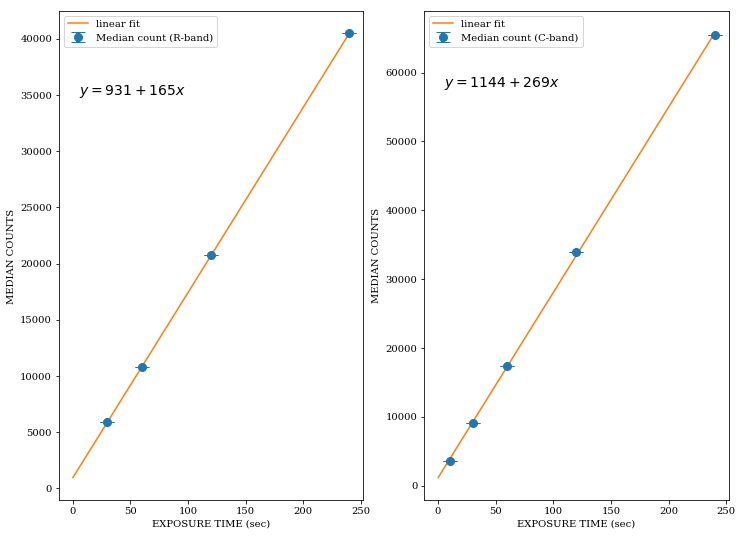

In [32]:
plt.figure(figsize = (12, 9))
plt.subplot(1,2,1)
plt.errorbar(x=exposure2, y=meds_flatr, yerr=stds_flatr, fmt='o',linestyle = "", 
             elinewidth = '4', capsize = 7,markersize = '8', label = 'Median count (R-band)')
plt.xlabel("EXPOSURE TIME (sec)"), plt.ylabel("MEDIAN COUNTS ")

plt.text(5,35000,r'$y=931+165 x$', fontsize=14)

xval=np.arange(0.1,250,10)
plt.plot(xval, 931.32608589 + ((164.95376812)* xval), label='linear fit')
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(x=exposure, y=meds_flatc, yerr=stds_flatc, fmt='o',linestyle = "", 
             elinewidth = '4', capsize = 7,markersize = '8', label = 'Median count (C-band)')
plt.xlabel("EXPOSURE TIME (sec)"), plt.ylabel("MEDIAN COUNTS")
plt.text(5,58000,r'$y=1144+269 x$', fontsize=14)


xval=np.arange(0.1,250,10)
plt.plot(xval, 1143.66039243 + ((269.25151723)* xval),label='linear fit')
plt.legend()
plt.savefig("FITComparisons_FLATCVSFLATR.pdf")
plt.show()

# Brice data
Flat in Binning 2x2 

In [37]:
datadir = "/Volumes/VIRT-Data/20170613/"
biglist_flatR=glob.glob(datadir+'flatR*')
biglist_flatC=glob.glob(datadir+'flatC*')
biglist_flatB=glob.glob(datadir+'flatB*')
biglist_flatV=glob.glob(datadir+'flatV*')
biglist_flatU=glob.glob(datadir+'flatU*')
biglist_flatO=glob.glob(datadir+'flato*')
biglist_flatI=glob.glob(datadir+'flatI*')

## We will work with the Median count per second per Filter

In [38]:
worklist_R = createlist(biglist_flatR, 45, -30)
worklist_C = createlist(biglist_flatC, 30, -30)
worklist_B = createlist(biglist_flatB, 120, -30)
worklist_V = createlist(biglist_flatV, 120, -30)
worklist_U = createlist(biglist_flatU, 180, -30)
worklist_O = createlist(biglist_flatO, 30, -30)
worklist_I = createlist(biglist_flatI, 120, -30)

In [39]:
print worklist_R

['/Volumes/VIRT-Data/20170613/flatR_2017613231043.fits', '/Volumes/VIRT-Data/20170613/flatR_2017613231148.fits', '/Volumes/VIRT-Data/20170613/flatR_2017613231254.fits', '/Volumes/VIRT-Data/20170613/flatR_201761323140.fits', '/Volumes/VIRT-Data/20170613/flatR_201761323157.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494016.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494122.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494228.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494333.fits', '/Volumes/VIRT-Data/20170613/flatR_201761494439.fits']


In [40]:
med_R, std_R= calcmed(worklist_R)
med_C, std_C= calcmed(worklist_C)
med_B, std_B= calcmed(worklist_B)
med_V, std_V= calcmed(worklist_V)
med_U, std_U= calcmed(worklist_U)
med_O, std_O= calcmed(worklist_O)
med_I, std_I= calcmed(worklist_I)

In [41]:
print med_U


1244.0


In [59]:
meds_flat=[med_O/30.,med_C/30., med_R/45., med_V/120., med_B/120,med_U/180.,med_I/120.]
stds_flat=[std_O/30.,std_C/30., std_R/45., std_V/120., std_B/120,std_U/180.,std_I/120.]

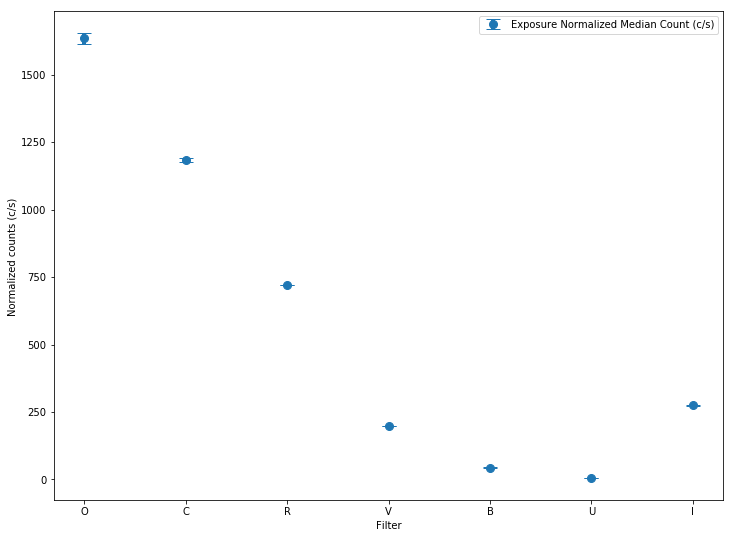

In [83]:
plt.figure(figsize = (12, 9))
xval=range(7)
plt.errorbar(x=xval, y=meds_flat, yerr=stds_flat, fmt='o',linestyle = "", 
             elinewidth = '4', capsize = 7,markersize = '8', 
             label = 'Exposure Normalized Median Count (c/s)')

plt.xlabel("Filter"), plt.ylabel("Normalized counts (c/s) ")

plt.xticks( np.arange(7),("O",'C','R','V','B','U','I'))
plt.legend()
#plt.savefig("Flat_normcount.pdf")
plt.show()

In [77]:
?plt.xticks
